### Set up workspace

In [1]:
import sys
sys.path.append('../')

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline

from plants_and_TCR.analysis_parameters import get_CMIP_info
from plants_and_TCR.analysis_parameters import directory_information
from plants_and_TCR.generate_figures import quick_map
from plants_and_TCR.analyze_data import multi_model_stats
from plants_and_TCR.process_data import make_processed_data_dict

PATH_REGRIDDED_DATA = directory_information.DIR_PROCESSED_DATA
PATH_FIGURES = directory_information.DIR_OUTPUT_FIGURES

rc('font',**{'family':'sans-serif','sans-serif':['Arial']})

### Calculations for Maps

In [3]:
PROC_DATA_DICT = make_processed_data_dict.create_variable_dictionary(runnames=['piControl', '1pctCO2', '1pctCO2-rad', '1pctCO2-bgc'],
                                                                             varname='tas',
                                                                             input_path=PATH_REGRIDDED_DATA,
                                                                             cdict_names=['CMIP5','CMIP6'])

tas_1pctCO2-bgc_CMIP6_NorESM2-LM is not in the dictionary


In [4]:
RUNNAME_INDS=[2,0] #[1,3] #[2,0]
END_YR=70
VARNAME='tas'
CMIP_NAMES=['CMIP6']

In [5]:
[ds_all_models_int,
 multimodelSum_int,
 positiveChangeCount_int,
 negativeChangeCount_int,
 num_models_with_data_int] = multi_model_stats.get_mm_mean(proc_data_dict=PROC_DATA_DICT,
                                                           varname=VARNAME,
                                                           end_yr=END_YR,
                                                           change_cutoff=0,
                                                           runname_inds=[2,0,1,3],
                                                           cmip_names = CMIP_NAMES)

No data for NorESM2-LM


In [6]:
mostlyAgree = multi_model_stats.calculate_where_models_mostly_agree(positiveChangeCount_int,
                                                                    negativeChangeCount_int,
                                                                    cut_off_num = 8,
                                                                    num_models=num_models_with_data_int)

### Make Figures

../plants_and_TCR/generate_figures/quick_map.py:85: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.
  cbar.set_clim(clim)


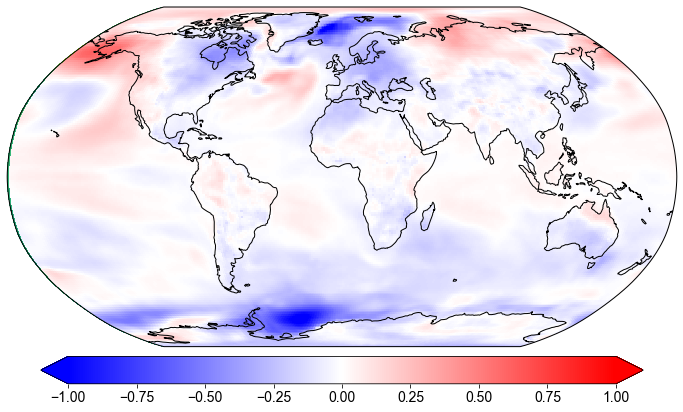

done saving file


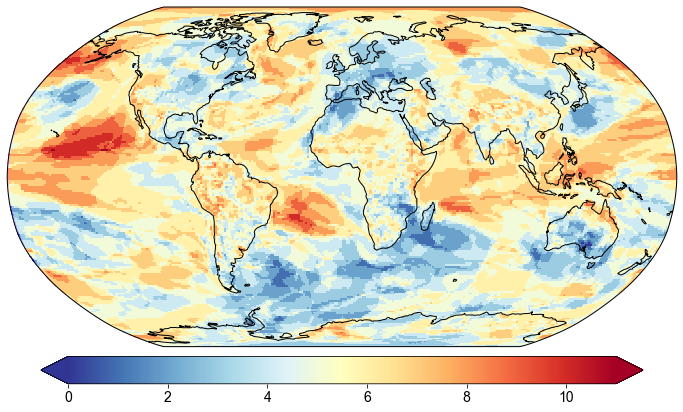

done saving file


(<Figure size 864x648 with 2 Axes>,
 <matplotlib.colorbar.Colorbar at 0x7f9ded8da908>)

In [7]:
quick_map.quick_map(ds_all_models_int[VARNAME].mean(dim='modelname', skipna=True).values,
                    ds_all_models_int['lat'].values,
                    ds_all_models_int['lon'].values,
                    clim=[-1,1],
                    cmap=plt.cm.bwr,
                    sighatch=False,
                    sigmask = -mostlyAgree,
                    p=0.0,
                    markersize=0.05,
                    filepath=PATH_FIGURES+'FigureS3a_Interaction_Term_Tas.png')

quick_map.quick_map(positiveChangeCount_int.values,
                    ds_all_models_int['lat'].values,
                    ds_all_models_int['lon'].values,
                    clim=[0,11],
                    cmap=plt.cm.RdYlBu_r,
                    sighatch=False,
                    p=0.0,
                   markersize=0.05,
                   filepath=PATH_FIGURES+'FigureS3b_Interaction_Term_ModelAgreement_Tas.png')